# CHAPTER 5: BUILDING, TUNING, AND DEPLOYMENT OF A ML MODEL
## Model Development Lifecycle
In this chapter, we embark on a comprehensive journey through the intricacies of building, tuning, and deploying machine learning (ML) models. The process of bringing a model from conception to deployment involves a series of crucial steps, each demanding careful consideration and expertise.

From the initial data preprocessing to model selection, hyperparameter tuning, and deployment strategies, this chapter covers it all. We'll delve into practical techniques, best practices, and tools necessary to navigate the complexities of the ML model development lifecycle effectively.

#### *By Jose Ruben Garcia Garcia*
#### *March 2024*
*Reference: Practical Machine Learning Python Problems Solver*


###  Classification

For this classificaction example, i'll use a multi-class classification problem for a handwritten digit recognition. The problem here is to predict the actual digit value from a handwritten image of a digit. For the dataset we have 1x64 feature vector wich represent the image representation of a grey scale image of the digit. 

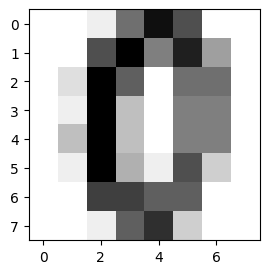

In [3]:
#Importing proper libraries and data

from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

#Plotting the 11th image from the dataset 
plt.figure(figsize=(3,3))
plt.imshow(digits.images[10], cmap=plt.cm.gray_r)

In [4]:
#How the raw pixel data looks in a vector representation

#actual image pixel matrix
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
#Flattened vector
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [6]:
#showing the image class label which will tell us what it's the correct representation of the digit, for our 11th label it will be a 0
digits.target[0]

0

For this approach I'm going to use a Logistic regression model to perform the task of classify each item 

In [7]:
X_digits = digits.data
y_digits = digits.target

num_data_points = len(X_digits)

X_train = X_digits[:int(.7*num_data_points)]
y_train = y_digits[:int(.7*num_data_points)]
X_test = X_digits[int(.7*num_data_points):]
y_test = y_digits[int(.7*num_data_points):]

print(X_train.shape, X_test.shape)

(1257, 64) (540, 64)


After the last output we can see that for the train dataset I have 1257 data points meanwhile for the test dataset I have 540 data points, Now I'll specify the model and it hyperparameters

In [8]:
from sklearn import linear_model 

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#Testing the model with a simple accuracy metric test on the test dataset
print('Logistic Regression mean accuracy: %f' % logistic.score(X_test, y_test))

Logistic Regression mean accuracy: 0.912963


The last output shown us that the accuracy for this simple model of classification is 91.3% What it's a good approach but this is a case with labeled data and not pre-processing step that in a really real world case most of the times had to be performed

### Clustering

For this example a labeled dataset will be used in order to cover the clustering methods and compare the results with the real data. I already know that labeled data is really hard to get in the real data world but for this example I'll select the Wisconsin Diagnostic Breast Cancer data set that has 30 features with a response feature saying if the pacient had or no a malignant (0) cancer. 

In [10]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [11]:
#Loading data
data = load_breast_cancer()
X = data.data
y = data.target

print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


To perform the clustering method I used the k-means algorithm that is based in a centroid based clustering algorithm, starting with some assumptions about the total cluster that we desired in random centers assigned to each of the clusters

In [12]:
from sklearn.cluster import KMeans

#Creating instance and we defined the n_clusters as 2 since I have only 2 observations that I want to know (it's the tumor malignant? (0)) 
km = KMeans(n_clusters=2)
km.fit(X)


#Getting centers and labels for both clusters 
labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])

[1 1 1 0 1 0 1 0 0 0]


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Since we have 30 features, It's a good idea to reduce the the number of features in order to have the most relevants columns of the dataset. For this I used the PCA technique to reduce the dimensional space.

In [13]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

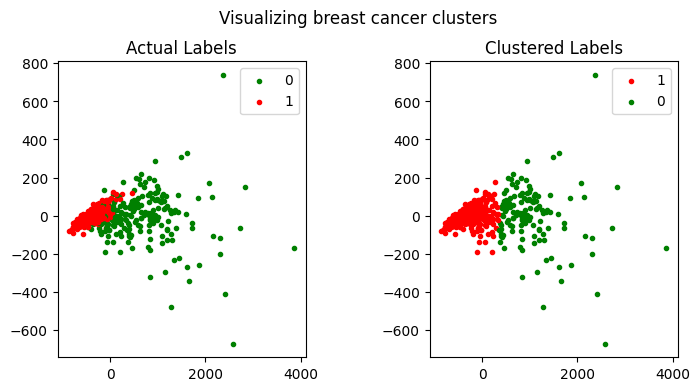

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '0'])

The chart help us to identify the the difference between the labeled y_response in the dataset with the real points (Left) and the cluster created by the algorithm (right), For me it's clear to see that algorithm worked fine since the difference between the points of both charts and it's clustering looks similar. Even with this is easy to say that the clusters are not perfect as we see some difference specifically in the points where the labels are divided, this is good to understand that real data world most of the times is not labeled and we need a really good knowledge in the business case in order to interpret a result and finally take a decision. 

### Hierarchical clustering

For this new approach I used the hierarchical clustering to compare results between the past k-means algorithm, So i used the same dataset and same business case. The method used comes from the scikit-learn module and It's called Agglormarativeclustering that uses a bottom up approach what means that each observation starts its own cluster and then the clusters are successively merged together. 

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress=True)

#Showing the linkage matrix using the minimim variance criterion
Z = linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


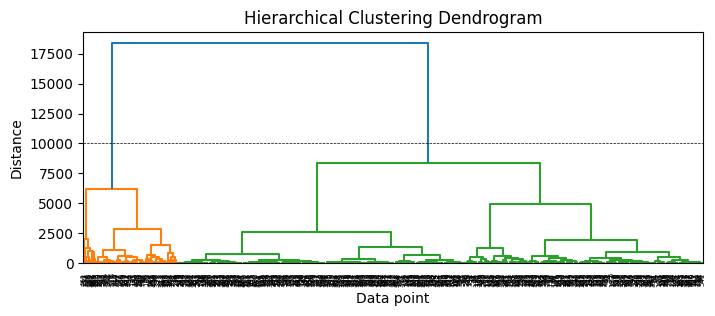

In [16]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

To see the distance-based merged the best way to do is using a dendrogram where we can see how each data point starts as an individual cluster and slowly starts to getting merged with other datapoint to form clusters

In [17]:
from scipy.cluster.hierarchy import fcluster

max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

Now let's compare the original labels and the output from this method with the PCA approach applied in the past method 

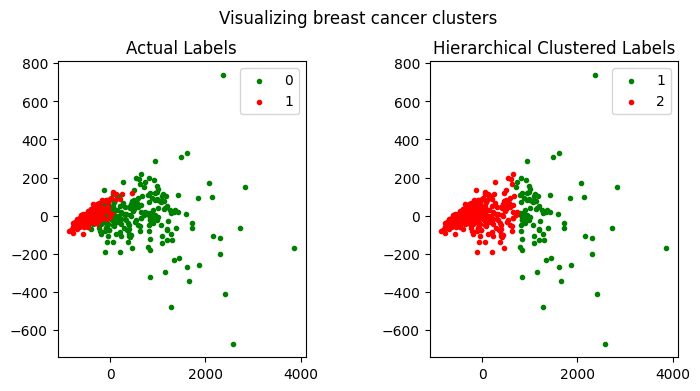

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])


For this algorithm we see 2 distinct clusters but there is more overlap as compared with the K-means method, moreover the 2 clusters have more mislabeled instances. The main advantage of this method is that we don't need to input the number of clusters beforehand. 

### Evaluation Metrics

Once we have created our model we can say that all it's ok but actually we are missing one of the must important things in a process of ML that it's *evaluation*. 

Model evaluation is the defining part of the iterative process which makes it iterative in nature, in addition Model evaluation help us to understand and try to change the parameters of the model process the it's commonly called model tuning. 

The ideal way to perform this step is to have some numerical metrics and measure the model effectiveness. So for this examples i'm going to use the same dataset of breast cancer in order to evaluate our models. 

#### Evaluating classification models 

In [19]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training subsets using the rule 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


#### Confusion Matrix

This is not exactly a metric but the method is commonly used to comparing the predicted class labels with the datapoints of the actual class labels. 

In [20]:
from sklearn import linear_model

#Train and build the model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

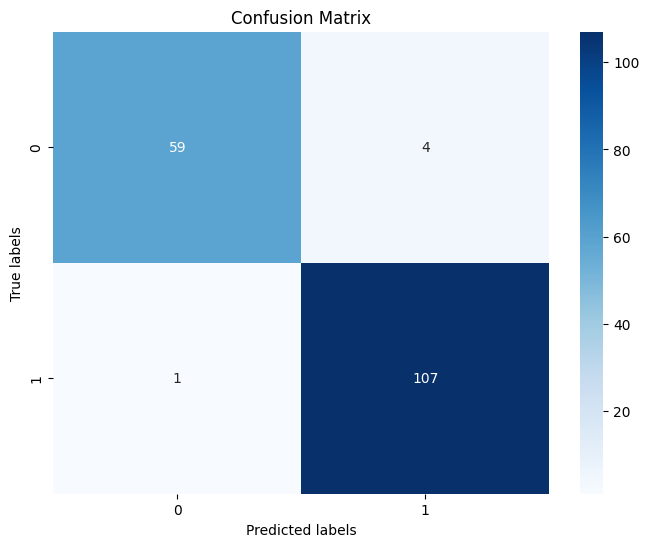

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = logistic.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

A typical confusion matrix looks like this:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| Actual Positive | True Positive      | False Negative     |
| Actual Negative | False Positive     | True Negative      |

Here's what each term in the confusion matrix means:

- **True Positive (TP)**: These are the cases where the model predicted the class correctly as positive when the actual class was positive. For example, in a medical context, it represents the number of patients the model correctly identified as having a disease.
  
- **True Negative (TN)**: These are the cases where the model predicted the class correctly as negative when the actual class was negative. For example, in a medical context, it represents the number of patients the model correctly identified as not having a disease.

- **False Positive (FP)**: These are the cases where the model predicted the class as positive when the actual class was negative. Also known as a Type I error. For example, in a medical context, it represents the number of healthy patients the model incorrectly identified as having a disease.

- **False Negative (FN)**: These are the cases where the model predicted the class as negative when the actual class was positive. Also known as a Type II error. For example, in a medical context, it represents the number of patients with a disease the model incorrectly identified as healthy.

Interpreting a confusion matrix involves examining these different scenarios to understand how well your model is performing. Key metrics derived from the confusion matrix include accuracy, precision, recall (sensitivity), specificity, and F1 score. These metrics provide insights into various aspects of the model's performance and help in assessing its effectiveness for the given task.


### Performance metrics

#### Accuracy

Accuracy is a metric that measures the proportion of correct predictions made by the model out of the total predictions. It is calculated by dividing the number of correct predictions (True Positives and True Negatives) by the total number of predictions made by the model (True Positives, True Negatives, False Positives, and False Negatives).


In [22]:
positive_class = 1
TP = 106
FP = 4
TN = 59
FN = 2

In [23]:
import model_evaluation_utils as meu

#Showing the accuracy of the model created
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.97076
Manually Computed Accuracy: 0.96491


#### Precision. 
Also known as positive predictive value, Defined by the number of predictions made that are actually correct or relevant out of all the predictions based on the positive class. 

In [24]:
#Showing the precision metric of the model
fw_prec = round(meu.metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)


Framework Precision: 0.96396
Manually Computed Precision: 0.96364


#### Recall or sensitivity
It's a measure of a model to identify the percentage of relevant data points. Defined as the number of the positive class that were correctly predicted.

In [25]:
# Showing the recall 
fw_rec = round(meu.metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN),5)
print('Framework Recall:', fw_acc)
print('Manually Computed recall:', mc_acc)

Framework Recall: 0.97076
Manually Computed recall: 0.96491


#### F1-SCORE
This is a metric that is the harmonic mean of precision and recall and help us to optimize a classifier for balanced precision and recall performance. 



In [26]:

fw_f1 = round(meu.metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.97717
Manually Computed F1-Score: 0.97248


### Receiver Operating Characteristic Curve - ROC
ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model across various thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at different threshold values. ROC curve helps visualize the trade-off between sensitivity and specificity, and the area under the ROC curve (AUC) quantifies the overall performance of the model in distinguishing between the classes.

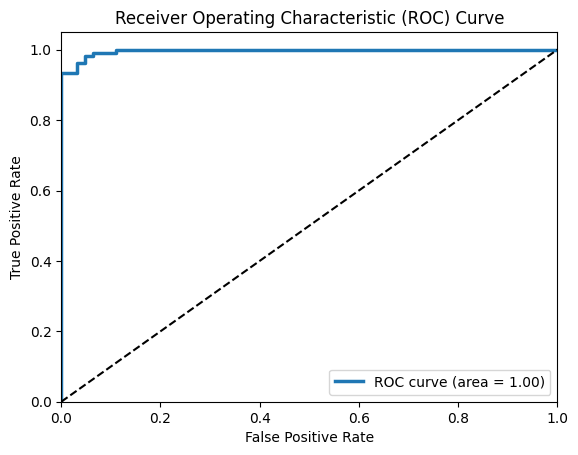

In [27]:
import model_evaluation_utils as meu
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

Considering that the model has an accuracy and f1 score of around 97% it will make sense since the curve in the chart is near perfect. 

#### Evaluating clustering models

For this example we will compare 2 models the first one using the original approach with 2 clusters and a new one defined by 5 clusters. This will help us to compare the evaluation in not labeled data. 

In [28]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### External validation
External validation Means validating the clustering model when we have some ground truth available as labeled data. The presence of external labeled reduces most of the complexity model evaluation as the clustering (unsupervised) model can be validated in similar fashion to classification models. 

To perform this exist 3 different metrics to validate clustering performance: 

Homogeneity measures the extent to which each cluster contains only data points that are members of a single class.

Completeness measures the extent to which all data points that are members of a given class are also elements of the same cluster.

V-measure is the harmonic mean of homogeneity and completeness, providing a balanced assessment of clustering quality.

In [30]:
from sklearn import datasets, metrics

km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-measure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-measure metrics for num clusters=5: ', km5_hcv)


Homogeneity, Completeness, V-measure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-measure metrics for num clusters=5:  [0.602 0.298 0.398]


With this we will see that V-measure for the first model with 2 clusters is better than the one with five clusters and the reason is because of higher completeness score.

#### Internal validation 

For clustering evaluation, internal validation refers to techniques that use inherent data information to assess the quality of clusters generated by a clustering algorithm without requiring external labels. Some common techniques of internal validation include:

Silhouette Score: Measures how well-separated clusters are and how similar points are within each cluster compared to other clusters. A higher silhouette score indicates better clustering quality.

Davies-Bouldin Index: Computes the "goodness" of clustering based on the distance between clusters and the dispersion within clusters. A lower value indicates better clustering quality.

Calinski-Harabasz Index: Evaluates the compactness of clusters and the separation between them. A higher value indicates better clustering quality.



##### Silhouette Coefficient

In [32]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.5102292997907838



From the result of this metrics is easy to see that we have a better quality with two clusters as compared to 5 clusters. 

##### Calinski-Harabaz Index

In [35]:
km2_chi = metrics.calinski_harabasz_score(X, km2_labels)
km5_chi = metrics.calinski_harabasz_score(X, km5_labels)

print('Calinski-Harabasz Index for num clusters=2: ', km2_chi)
print('Calinski-Harabasz Index for num clusters=5: ', km5_chi)

Calinski-Harabasz Index for num clusters=2:  1300.2082268895424
Calinski-Harabasz Index for num clusters=5:  1621.0110530063253


### Evaluating Regression models

#### Coefficient of Determination or r2
The coefficient of determination, also known as R2
  (R-squared), is a statistical measure indicating how much variability in the dependent variable can be explained by the regression model. It is commonly used to assess the goodness of fit of a regression model to the observed data.

#### Mean Squared Error
MSE (Mean Squared Error) is a statistical metric used to measure the average squared difference between the actual and predicted values in a regression problem. It provides a quantification of the average squared deviation or error of the predictions from the true values. A lower MSE indicates that the model's predictions are closer to the actual values, while a higher MSE suggests larger discrepancies between the predicted and actual values. MSE is widely used as a loss function in regression algorithms and serves as a key measure of the model's performance in fitting the data.

### Model Tunning

Model tuning, also known as hyperparameter tuning, refers to the process of optimizing the hyperparameters of a machine learning model to improve its performance on unseen data. Hyperparameters are settings that are external to the model and cannot be learned from the data, such as the learning rate in neural networks or the depth of a decision tree.

The goal of model tuning is to find the combination of hyperparameters that maximizes the model's performance metrics, such as accuracy, precision, or recall, on a validation dataset. This process typically involves:

Selection of Hyperparameters: Identifying the hyperparameters to be tuned and their potential ranges or values.

Hyperparameter Search: Performing a search over the hyperparameter space to find the optimal combination. This can be done using techniques like grid search, random search, or more advanced optimization algorithms like Bayesian optimization.

Evaluation: Assessing the performance of the model with each combination of hyperparameters using cross-validation or a separate validation dataset.

Selection of Best Model: Choosing the set of hyperparameters that result in the best performance based on the chosen evaluation metric.

Model tuning is a crucial step in the machine learning pipeline as it can significantly impact the model's performance and generalization ability. It requires careful experimentation and optimization to find the optimal configuration for the specific problem at hand.

#### Hyperparameter tuning strategies

##### Build and Evaluate Default Model

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a Support Vector Classifier with default parameters
def_svc = SVC(random_state=42)

# Train the classifier on the training data
def_svc.fit(X_train, y_train)

# Make predictions on the testing data
def_y_pred = def_svc.predict(X_test)

# Print classification report to evaluate model performance
print('Default Model Stats:')
print(metrics.classification_report(y_test, def_y_pred))



Default Model Stats:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



#### Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

# setting the parameter grid
grid_parameters = {'kernel': ['linear', 'rbf'], 
                   'gamma': [1e-3, 1e-4],
                   'C': [1, 10, 50, 100]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:

0.95218 (+/-0.06256) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.91193 (+/-0.04607) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.95218 (+/-0.06256) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.92459 (+/-0.02287) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.96228 (+/-0.04244) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.90187 (+/-0.04735) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.96228 (+/-0.04244) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.92959 (+/-0.03449) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95718 (+/-0.05923) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.90187 (+/-0.04735) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.95718 (+/-0.05923) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.93462 (+/-0.02969) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95468 (+/-0.05703) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.90187

This output displays the results of hyperparameter tuning for accuracy using cross-validation. Each line shows a combination of hyperparameters along with the accuracy score and standard deviation. The best parameters found are shown at the end. This helps optimize the model's parameters for achieving the highest accuracy on unseen data.

##### Evaluate Grid Search Tuned Model

In [43]:
# Get the best estimator from the grid search
gs_best = clf.best_estimator_

# Make predictions using the tuned model
tuned_y_pred = gs_best.predict(X_test)

# Print classification report to evaluate model performance
print('\n\nTuned Model Stats:')
print(metrics.classification_report(y_test, tuned_y_pred))




Tuned Model Stats:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



##### Tune Model with Randomized Search


In [44]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': scipy.stats.expon(scale=10), 
              'gamma': scipy.stats.expon(scale=.1),
              'kernel': ['rbf', 'linear']}

random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_grid,
                                   n_iter=50, cv=5)
random_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
random_search.best_params_

Best parameters set found on development set:


{'C': 6.955268641460015, 'gamma': 0.3663830820290041, 'kernel': 'linear'}

##### Evaluate Randomized Search Tuned Model

In [45]:

rs_best = random_search.best_estimator_
rs_y_pred = rs_best.predict(X_test)
meu.get_metrics(true_labels=y_test, predicted_labels=rs_y_pred)

Accuracy: 0.9766
Precision: 0.9766
Recall: 0.9766
F1 Score: 0.9766


#### Model Interpretation


In [49]:
# Import necessary libraries
from sklearn.metrics import classification_report

# Make predictions using logistic regression model
y_pred_proba = logistic.predict_proba(X_test)
y_pred = logistic.predict(X_test)

# Print classification report to evaluate model performance
print('\n\nTuned Model Stats:')
print(classification_report(y_test, y_pred))




Tuned Model Stats:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Skater Library: Simplifying Model Interpretation and Explanation

The Skater library is a Python tool designed to simplify the interpretation and explanation of machine learning models. It offers a comprehensive set of techniques and tools to help data scientists and machine learning practitioners understand how models make predictions and which features are most influential.

### Key Features and Functionalities:

1. **Model Interpretation**: Skater provides various methods for interpreting machine learning models. This includes visualizations such as feature importance plots, which highlight the most important features for making predictions, and feature contribution analysis, which helps understand how individual features contribute to model predictions. Additionally, Skater offers partial dependence analysis, which shows how the predicted outcome changes as one or more features vary.

2. **Data Exploration**: Understanding the data used to train machine learning models is crucial for building reliable and accurate models. Skater offers tools for exploring and analyzing data, allowing users to identify patterns, anomalies, or biases in the data. This helps ensure that the models are trained on high-quality data and can make accurate predictions on new data.

3. **Model Explainability**: Skater helps explain how machine learning models arrive at their predictions. By providing insights into the reasoning behind model decisions, users can better understand and trust the model's predictions. Skater's explainability features enable users to evaluate the reliability and fairness of models and identify potential sources of bias.

4. **Model Evaluation**: Evaluating the performance of machine learning models is essential for assessing their effectiveness and identifying areas for improvement. Skater offers functionalities for evaluating model performance, including various evaluation metrics, cross-validation techniques, and tools for comparing different models. This allows users to select the best-performing models for their specific use case and optimize model performance over time.

### Practical Challenges:

Despite its powerful capabilities, integrating Skater into your machine learning workflow may encounter practical challenges. For instance, if you experience issues with library compatibility or version dependencies, it can hinder your ability to incorporate Skater's features seamlessly into your Jupyter Notebook or Python environment. In some cases, this may require updating or adjusting your Python environment to resolve compatibility issues and ensure smooth integration of Skater's functionality.The Skater library serves as a valuable resource for data scientists, researchers, and developers working on machine learning projects. By simplifying model interpretation and explanation, Skater empowers users to gain deeper insights into their models, understand how they make predictions, and build more reliable and transparent machine learning systems.


## Model deployment

Model deployment is a critical phase in the machine learning pipeline where the trained models are put into production to make predictions on real-world data. In this section, we will explore various aspects of deploying machine learning models, including:

Model Serialization: Learn how to serialize trained models into a format suitable for deployment and consumption by other applications.

API Development: Understand the process of building APIs (Application Programming Interfaces) to expose machine learning models as services, allowing them to receive input data and return predictions.

Scalability and Performance: Explore strategies for deploying models that can handle large volumes of data and concurrent requests efficiently.

Monitoring and Maintenance: Discover best practices for monitoring deployed models, detecting performance degradation, and performing maintenance tasks to ensure continued reliability and accuracy.

Whether you're deploying models for internal use within your organization or as part of a customer-facing application, this section will provide valuable insights and practical guidance to help you navigate the complexities of model deployment effectively.

#### Model persistance 

In [74]:
#Saving the model on the disk with a file name
import joblib
joblib.dump(logistic,'lr_model.pkl')

['lr_model.pkl']

In [76]:
#Load the created model again.
lr = joblib.load('lr_model.pkl')
lr

LogisticRegression()

In [77]:
#Making predictions with the model loaded. 

print(lr.predict(X_test[10:11]),y_test[10:11])

[1] [1]


For sure this is just and example a better case solution for a non-data science user is to create a python based script or application that can be scheduled to predict in a realtime or batches or new data.